In [6]:
#case2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('HR_data.csv')

#print header
print(data.head())


   Unnamed: 0  HR_TD_Mean  HR_TD_Median  HR_TD_std  HR_TD_Min  HR_TD_Max  \
0           0   78.663878         76.70   7.480043      67.25      92.48   
1           1   76.540732         76.61   2.584756      69.82      82.33   
2           2   78.173563         77.92   2.681255      72.22      82.80   
3           3   83.073688         83.88   7.363598      69.42      96.12   
4           4   72.281250         72.91   3.193762      64.95      79.98   

   HR_TD_AUC  HR_TD_Kurtosis  HR_TD_Skew  HR_TD_Slope_min  ...  upset  \
0  23048.450       -1.091448    0.369955          -0.7300  ...    1.0   
1  23959.920       -0.245338    0.338732          -0.3600  ...    2.0   
2  20324.605       -0.615922   -0.233047          -0.6300  ...    1.0   
3  24924.300       -0.866610   -0.046021          -0.4650  ...    1.0   
4  23052.100        0.200401   -0.560948          -0.3725  ...    3.0   

   hostile  alert  ashamed  inspired  nervous  attentive  afraid  active  \
0      1.0    2.0      1.0  

In [7]:
print(data.columns)

Index(['Unnamed: 0', 'HR_TD_Mean', 'HR_TD_Median', 'HR_TD_std', 'HR_TD_Min',
       'HR_TD_Max', 'HR_TD_AUC', 'HR_TD_Kurtosis', 'HR_TD_Skew',
       'HR_TD_Slope_min', 'HR_TD_Slope_max', 'HR_TD_Slope_mean', 'HR_TD_Slope',
       'TEMP_TD_Mean', 'TEMP_TD_Median', 'TEMP_TD_std', 'TEMP_TD_Min',
       'TEMP_TD_Max', 'TEMP_TD_AUC', 'TEMP_TD_Kurtosis', 'TEMP_TD_Skew',
       'TEMP_TD_Slope_min', 'TEMP_TD_Slope_max', 'TEMP_TD_Slope_mean',
       'TEMP_TD_Slope', 'EDA_TD_P_Mean', 'EDA_TD_P_Median', 'EDA_TD_P_std',
       'EDA_TD_P_Min', 'EDA_TD_P_Max', 'EDA_TD_P_AUC', 'EDA_TD_P_Kurtosis',
       'EDA_TD_P_Skew', 'EDA_TD_P_Slope_min', 'EDA_TD_P_Slope_max',
       'EDA_TD_P_Slope_mean', 'EDA_TD_P_Slope', 'EDA_TD_T_Mean',
       'EDA_TD_T_Median', 'EDA_TD_T_std', 'EDA_TD_T_Min', 'EDA_TD_T_Max',
       'EDA_TD_T_AUC', 'EDA_TD_T_Kurtosis', 'EDA_TD_T_Skew',
       'EDA_TD_T_Slope_min', 'EDA_TD_T_Slope_max', 'EDA_TD_T_Slope_mean',
       'EDA_TD_T_Slope', 'EDA_TD_P_Peaks', 'EDA_TD_P_RT', 'EDA_TD_P_R

In [8]:
#show missing value in features at EDA_TD_P_RT and EDA_TD_P_ReT
print(data[data.isna().any(axis=1)])
#just drop this row
data = data.dropna()
print(data.head())

     Unnamed: 0  HR_TD_Mean  HR_TD_Median  HR_TD_std  HR_TD_Min  HR_TD_Max  \
104         104   83.758589        83.075   3.465654      78.33      93.55   
120         120   64.966797        62.725   7.655497      57.32      89.38   
122         122   69.815920        72.050   4.761262      59.43      75.38   
125         125   69.222492        65.350  10.880043      57.62      94.38   
272         272   84.923904        86.950   7.378264      67.25      98.45   

     HR_TD_AUC  HR_TD_Kurtosis  HR_TD_Skew  HR_TD_Slope_min  ...  upset  \
104  27219.015        1.316130    1.257816          -0.4300  ...    1.0   
120  19803.415        3.132358    1.991410          -0.9325  ...    2.0   
122  20807.725       -0.755575   -0.801089          -0.5125  ...    2.0   
125  21041.055       -0.330384    1.044434          -0.7600  ...    3.0   
272  21224.175       -0.716559   -0.555002          -3.3660  ...    1.0   

     hostile  alert  ashamed  inspired  nervous  attentive  afraid  active  \
10

In [9]:
#from column Round in features, leftstrip the string 'round_' and convert to int
data['Round'] = data['Round'].str.lstrip('round_').astype(int)
#same with column Phase, lefstrip 'phase' and convert to int
data['Phase'] = data['Phase'].str.lstrip('phase').astype(int)
print(data.head())

   Unnamed: 0  HR_TD_Mean  HR_TD_Median  HR_TD_std  HR_TD_Min  HR_TD_Max  \
0           0   78.663878         76.70   7.480043      67.25      92.48   
1           1   76.540732         76.61   2.584756      69.82      82.33   
2           2   78.173563         77.92   2.681255      72.22      82.80   
3           3   83.073688         83.88   7.363598      69.42      96.12   
4           4   72.281250         72.91   3.193762      64.95      79.98   

   HR_TD_AUC  HR_TD_Kurtosis  HR_TD_Skew  HR_TD_Slope_min  ...  upset  \
0  23048.450       -1.091448    0.369955          -0.7300  ...    1.0   
1  23959.920       -0.245338    0.338732          -0.3600  ...    2.0   
2  20324.605       -0.615922   -0.233047          -0.6300  ...    1.0   
3  24924.300       -0.866610   -0.046021          -0.4650  ...    1.0   
4  23052.100        0.200401   -0.560948          -0.3725  ...    3.0   

   hostile  alert  ashamed  inspired  nervous  attentive  afraid  active  \
0      1.0    2.0      1.0  

In [10]:
#check where is NaN
print(data.isna().sum())

Unnamed: 0      0
HR_TD_Mean      0
HR_TD_Median    0
HR_TD_std       0
HR_TD_Min       0
               ..
nervous         0
attentive       0
afraid          0
active          0
determined      0
Length: 68, dtype: int64


In [11]:
#Seperate the data into two groups, features and response (emotions)
features = data.iloc[:, :-12]
response = data.iloc[:, -12:]
print(features.head())


   Unnamed: 0  HR_TD_Mean  HR_TD_Median  HR_TD_std  HR_TD_Min  HR_TD_Max  \
0           0   78.663878         76.70   7.480043      67.25      92.48   
1           1   76.540732         76.61   2.584756      69.82      82.33   
2           2   78.173563         77.92   2.681255      72.22      82.80   
3           3   83.073688         83.88   7.363598      69.42      96.12   
4           4   72.281250         72.91   3.193762      64.95      79.98   

   HR_TD_AUC  HR_TD_Kurtosis  HR_TD_Skew  HR_TD_Slope_min  ...  \
0  23048.450       -1.091448    0.369955          -0.7300  ...   
1  23959.920       -0.245338    0.338732          -0.3600  ...   
2  20324.605       -0.615922   -0.233047          -0.6300  ...   
3  24924.300       -0.866610   -0.046021          -0.4650  ...   
4  23052.100        0.200401   -0.560948          -0.3725  ...   

   EDA_TD_T_Slope_max  EDA_TD_T_Slope_mean  EDA_TD_T_Slope  EDA_TD_P_Peaks  \
0            0.000138             0.000010    1.036040e-05          

(307, 2)
[[-3.35937617  0.75282994]
 [-3.51069586 -0.39671551]
 [-4.11850194 -0.29530979]
 [-3.69811108  0.95097154]
 [-3.82869069 -0.29095702]]


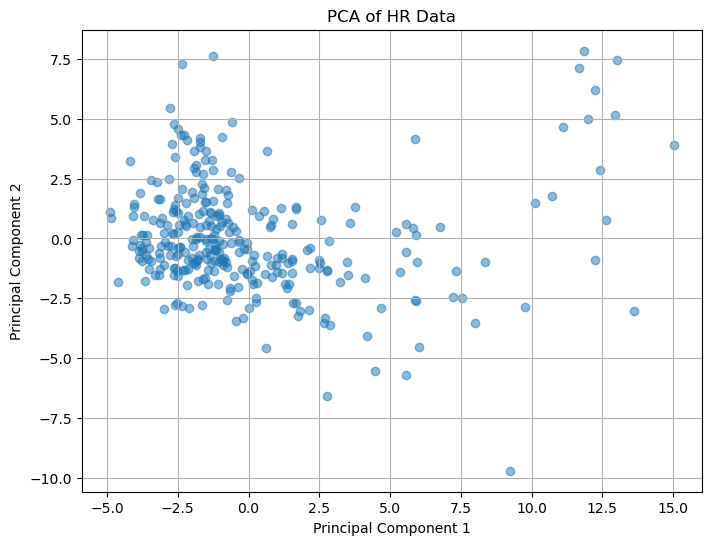

In [12]:
#PCA on features

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


pca = PCA(n_components=2)
pca.fit(features_scaled)

features_pca = pca.transform(features_scaled)
print(features_pca.shape)
print(features_pca[:5])
#Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], alpha=0.5)
plt.title('PCA of HR Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()



(307, 2)
[[-3.24207041  0.43507986]
 [-3.49609533 -0.5261286 ]
 [-4.04976783 -0.51017195]
 [-3.59088264  1.19043622]
 [-3.82492366 -0.88878307]]


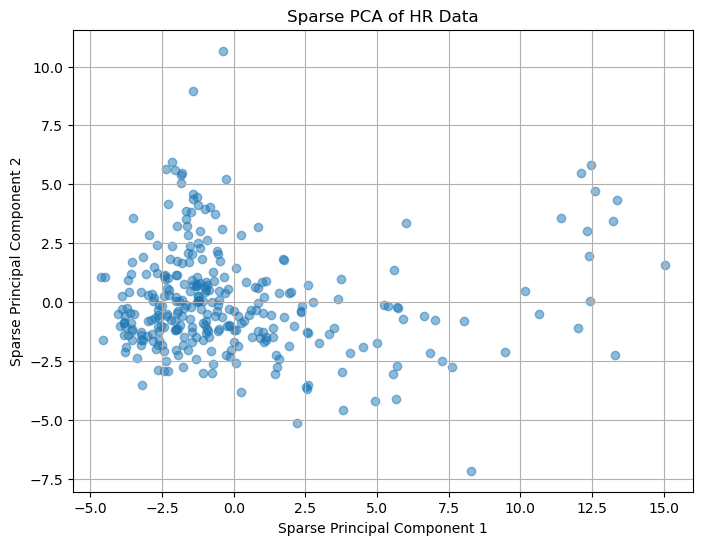

In [13]:
#sPCA on features
from sklearn.decomposition import SparsePCA
#Apply Sparse PCA
sparse_pca = SparsePCA(n_components=2, random_state=42)
sparse_pca.fit(features_scaled)
features_sparse_pca = sparse_pca.transform(features_scaled)
print(features_sparse_pca.shape)
print(features_sparse_pca[:5])
#Plot the Sparse PCA results
plt.figure(figsize=(8, 6))
plt.scatter(features_sparse_pca[:, 0], features_sparse_pca[:, 1], alpha=0.5)
plt.title('Sparse PCA of HR Data')
plt.xlabel('Sparse Principal Component 1')
plt.ylabel('Sparse Principal Component 2')
plt.grid()
plt.show()


(307, 2)
[[-0.72132724 -0.6118364 ]
 [-0.30245438 -0.89289972]
 [-0.41968936 -1.01105313]
 [-0.84067919 -0.64734669]
 [-0.38389119 -0.94342612]]


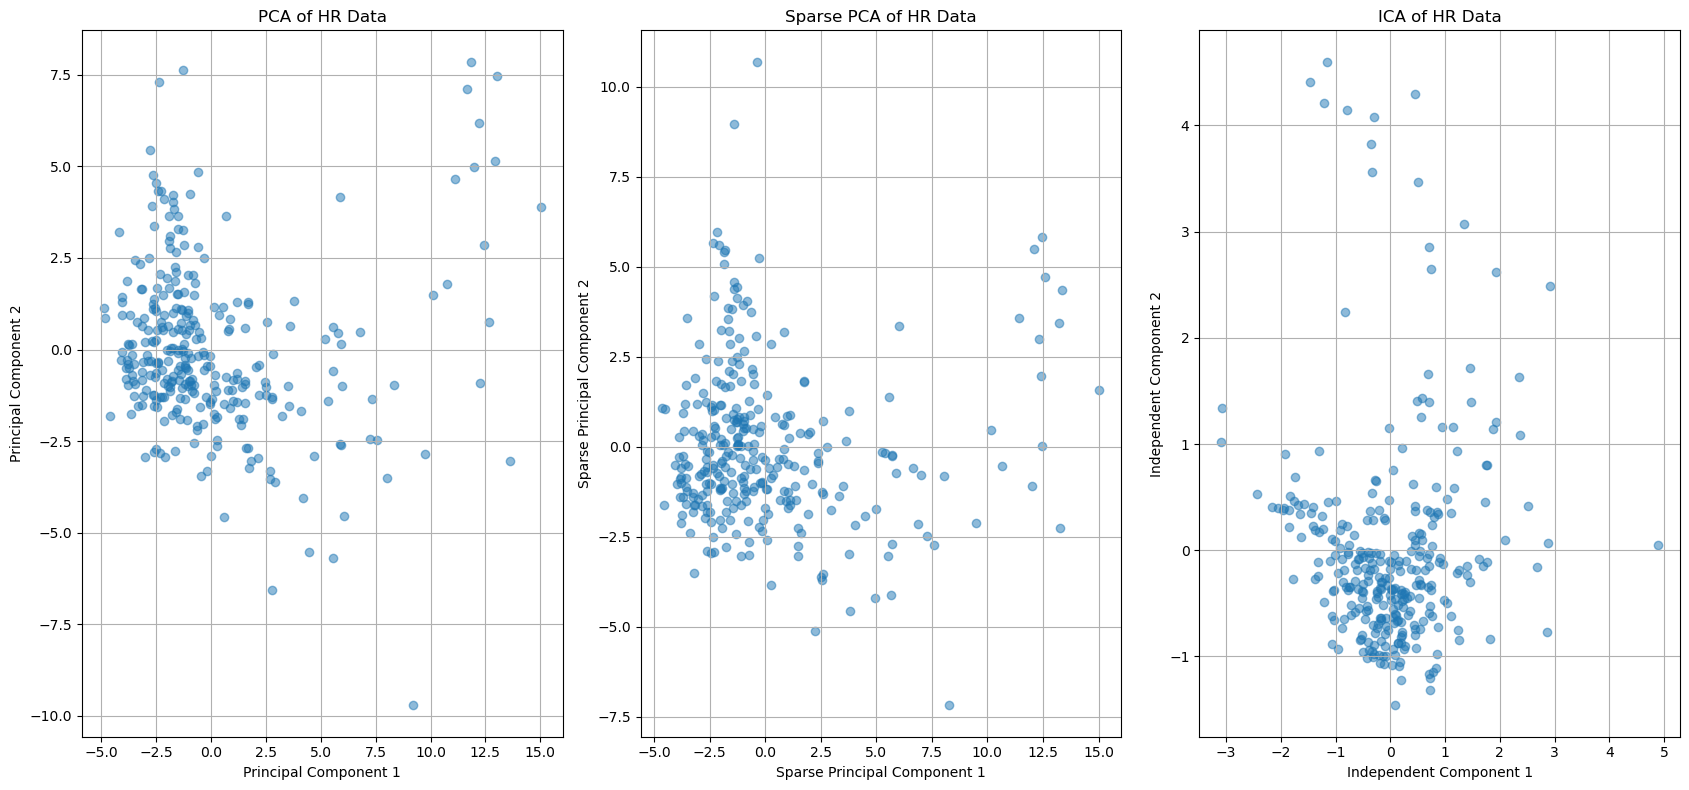

In [14]:
#PCA and sPCA and ICA in same plot
from sklearn.decomposition import FastICA
#Apply ICA
ica = FastICA(n_components=2, random_state=42)
ica.fit(features_scaled)
features_ica = ica.transform(features_scaled)
print(features_ica.shape)
print(features_ica[:5])
#Plot the PCA, Sparse PCA and ICA results
plt.figure(figsize=(17, 8))
#plot vertically instead of horizontally
plt.subplot(1, 3, 1)
plt.scatter(features_pca[:, 0], features_pca[:, 1], alpha=0.5)
plt.title('PCA of HR Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.subplot(1, 3, 2)
plt.scatter(features_sparse_pca[:, 0], features_sparse_pca[:, 1], alpha=0.5)
plt.title('Sparse PCA of HR Data')
plt.xlabel('Sparse Principal Component 1')
plt.ylabel('Sparse Principal Component 2')
plt.grid()
plt.subplot(1, 3, 3)
plt.scatter(features_ica[:, 0], features_ica[:, 1], alpha=0.5)
plt.title('ICA of HR Data')
plt.xlabel('Independent Component 1')
plt.ylabel('Independent Component 2')
plt.grid()
plt.tight_layout()
plt.show()


In [15]:
response.columns

Index(['Frustrated', 'Cohort', 'upset', 'hostile', 'alert', 'ashamed',
       'inspired', 'nervous', 'attentive', 'afraid', 'active', 'determined'],
      dtype='object')

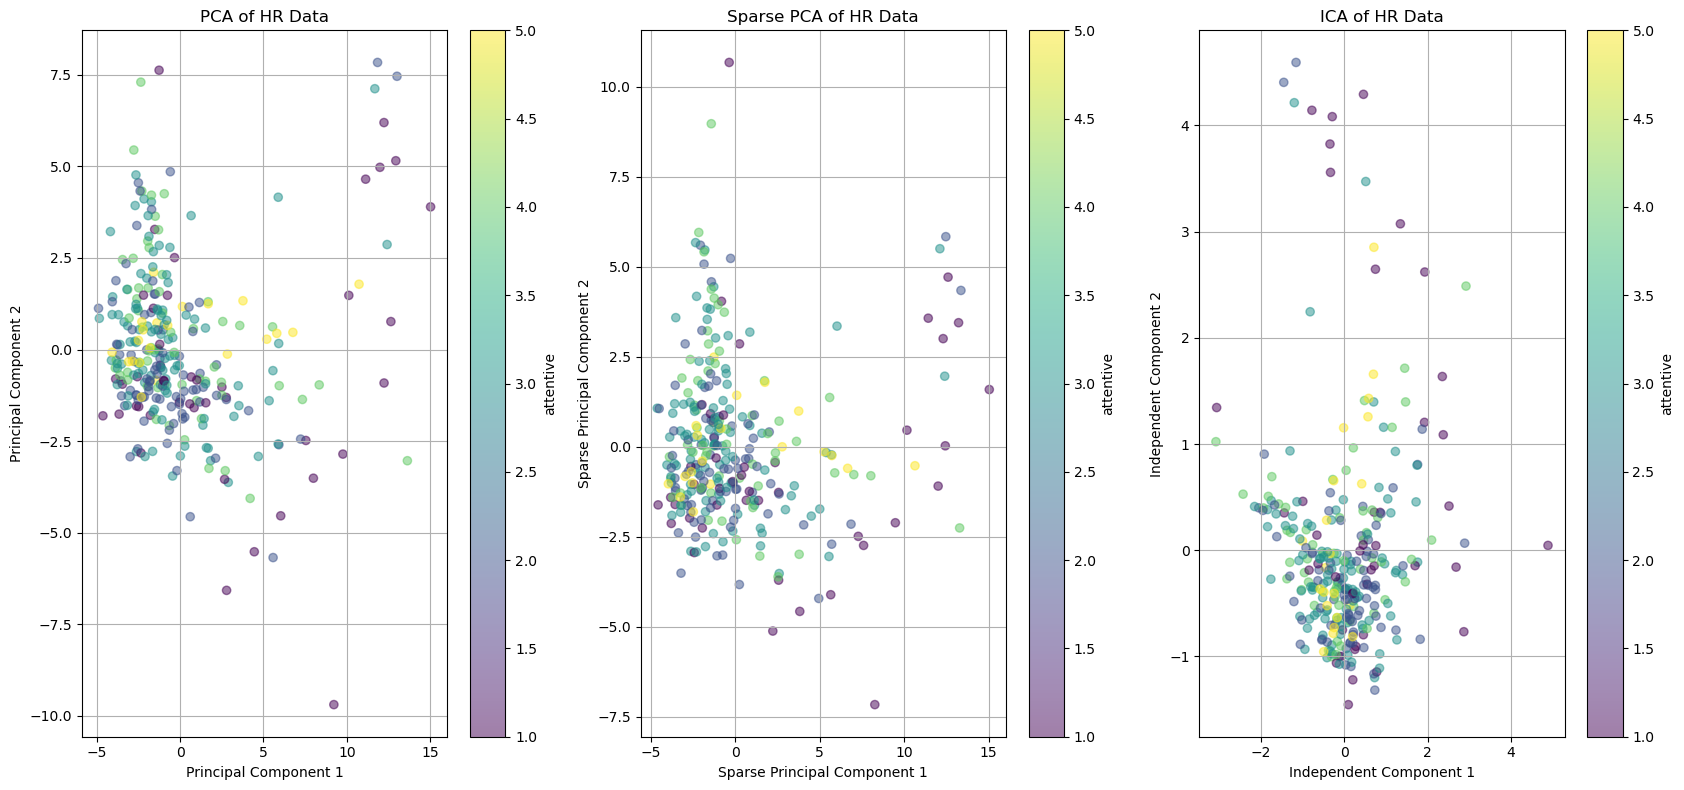

In [16]:
#plot again but color by some response variable

emotion = 'attentive'
col_var = response[emotion]

plt.figure(figsize=(17, 8))
plt.subplot(1, 3, 1)
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=col_var, cmap='viridis', alpha=0.5)
plt.title('PCA of HR Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label=emotion)
plt.grid()
plt.subplot(1, 3, 2)
plt.scatter(features_sparse_pca[:, 0], features_sparse_pca[:, 1], c=col_var, cmap='viridis', alpha=0.5)
plt.title('Sparse PCA of HR Data')
plt.xlabel('Sparse Principal Component 1')
plt.ylabel('Sparse Principal Component 2')
plt.colorbar(label=emotion)
plt.grid()
plt.subplot(1, 3, 3)
plt.scatter(features_ica[:, 0], features_ica[:, 1], c=col_var, cmap='viridis', alpha=0.5)
plt.title('ICA of HR Data')
plt.xlabel('Independent Component 1')
plt.ylabel('Independent Component 2')
plt.colorbar(label=emotion)
plt.grid()
plt.tight_layout()
plt.show()


📈 Correlation of each IC with the emotion:
IC1     0.131402
IC9     0.110003
IC28   -0.100797
IC3    -0.098967
IC19    0.096334
IC12    0.096319
IC2    -0.091394
IC5     0.089630
IC25   -0.085778
IC17   -0.085179
IC22    0.085101
IC21   -0.083972
IC29   -0.080385
IC8     0.074342
IC4    -0.073696
IC24    0.070360
IC30   -0.051154
IC6    -0.048406
IC23    0.048340
IC16   -0.041568
IC27    0.026856
IC20    0.026373
IC10    0.021120
IC14    0.015432
IC18   -0.014439
IC7    -0.013694
IC11   -0.011639
IC13   -0.010355
IC15    0.007662
IC26    0.005151
Name: attentive_z, dtype: float64


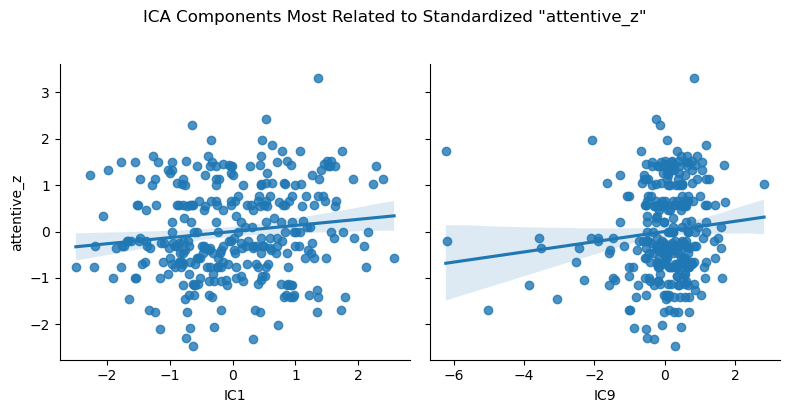

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load and clean data ---
data = pd.read_csv("HR_data.csv")
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns='Unnamed: 0')

# --- Feature and emotion separation ---
feature_cols = [col for col in data.columns if col.startswith(("HR_", "TEMP_", "EDA_"))]
emotion_col = 'attentive'  # 👈 the emotion you're investigating

# --- Drop missing emotion values ---
data = data.dropna(subset=[emotion_col])

# ✨ Standardize emotional response per participant (optional, recommended) ✨
# If you have a column like 'Individual', standardize emotion per person:
if 'Individual' in data.columns:
    data[emotion_col + '_z'] = data.groupby('Individual')[emotion_col].transform(
        lambda x: StandardScaler().fit_transform(x.values.reshape(-1, 1)).flatten()
    )
    emotion_col = emotion_col + '_z'  # use standardized column from now on
else:
    # Or just standardize globally if you don’t have per-participant data
    data[emotion_col + '_z'] = StandardScaler().fit_transform(data[[emotion_col]])
    emotion_col = emotion_col + '_z'

# --- Prepare features and response ---
X = data[feature_cols]
y_emotion = data[emotion_col]

# --- Impute and scale features ---
X_imputed = SimpleImputer(strategy='mean').fit_transform(X)
X_std = StandardScaler().fit_transform(X_imputed)

# --- Run ICA ---
n_components = 30
ica = FastICA(n_components=n_components, random_state=42)
X_ica = ica.fit_transform(X_std)

# --- Correlate ICs with the emotion ---
ica_df = pd.DataFrame(X_ica, columns=[f'IC{i+1}' for i in range(n_components)])
ica_df[emotion_col] = y_emotion.reset_index(drop=True)

correlations = ica_df.corr()[emotion_col].drop(emotion_col).sort_values(key=abs, ascending=False)

print("\n📈 Correlation of each IC with the emotion:")
print(correlations)

# --- Plot top 2 ICs against emotion ---
top2 = correlations.index[:2]
sns.pairplot(ica_df, x_vars=top2, y_vars=emotion_col, kind='reg', height=4)
plt.suptitle(f'ICA Components Most Related to Standardized \"{emotion_col}\"', y=1.02)
plt.tight_layout()
plt.show()


C:\Users\v\AppData\Local\Temp\ipykernel_22396\2766319206.py:62: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\v\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


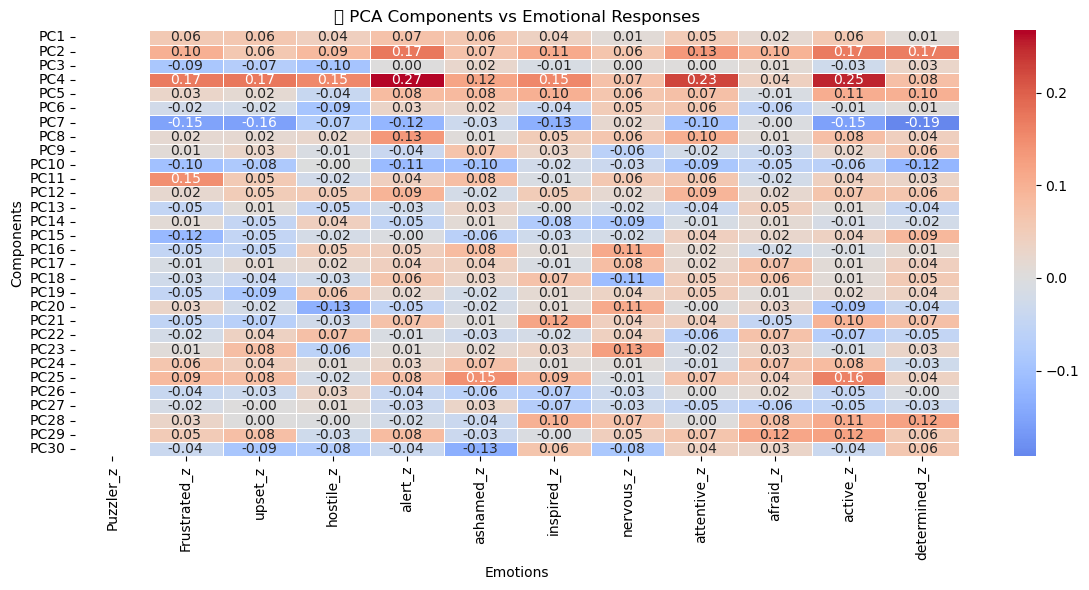

C:\Users\v\AppData\Local\Temp\ipykernel_22396\2766319206.py:62: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\v\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


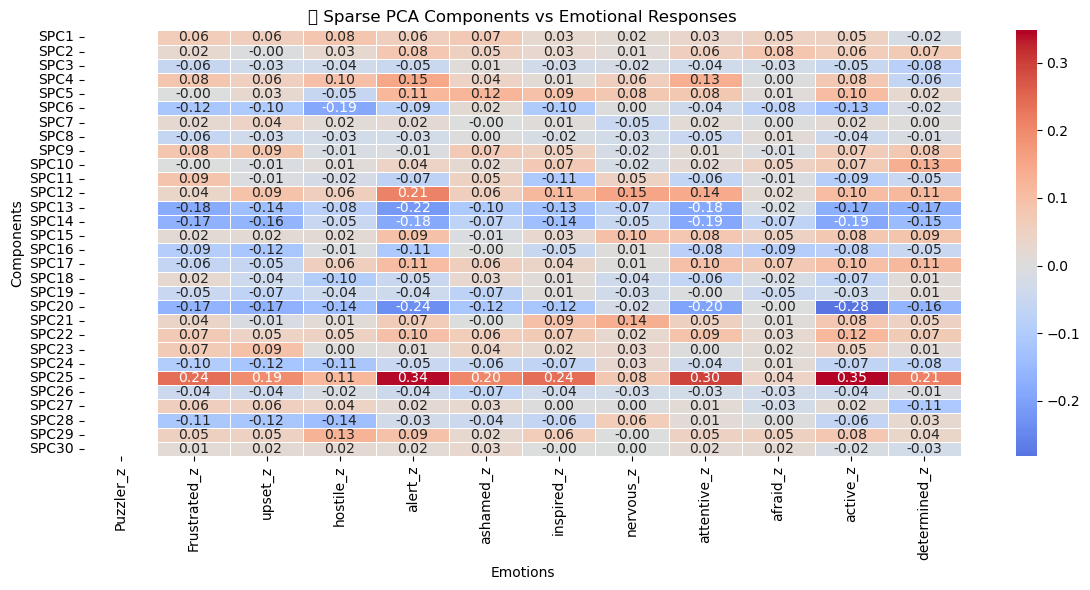

In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA, SparsePCA
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv("HR_data.csv")
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns='Unnamed: 0')

# Columns setup
physio_cols = [col for col in data.columns if col.startswith(("HR_", "TEMP_", "EDA_"))]
emotion_cols = ['Puzzler', 'Frustrated', 'upset', 'hostile', 'alert', 'ashamed',
                'inspired', 'nervous', 'attentive', 'afraid', 'active', 'determined']

# Drop rows with missing emotion values
data = data.dropna(subset=emotion_cols)

# ✨ Standardize emotion ratings across individuals
if 'Individual' in data.columns:
    for emo in emotion_cols:
        data[emo + '_z'] = data.groupby('Individual')[emo].transform(
            lambda x: StandardScaler().fit_transform(x.values.reshape(-1, 1)).flatten()
        )
    emotion_cols = [emo + '_z' for emo in emotion_cols]
else:
    # Global standardization (fallback)
    data[emotion_cols] = StandardScaler().fit_transform(data[emotion_cols])

# Handle missing physiologic values
X = data[physio_cols]
y_emotions = data[emotion_cols]
X_imputed = SimpleImputer(strategy='mean').fit_transform(X)
X_std = StandardScaler().fit_transform(X_imputed)

# Choose number of components
n_components = 30

# PCA
pca = PCA(n_components=n_components, random_state=42)
X_pca = pca.fit_transform(X_std)
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)])

# Sparse PCA
spca = SparsePCA(n_components=n_components, random_state=42)
X_spca = spca.fit_transform(X_std)
spca_df = pd.DataFrame(X_spca, columns=[f'SPC{i+1}' for i in range(n_components)])

# Combine and correlate with emotions
def plot_heatmap(df, title):
    combined = pd.concat([df, y_emotions.reset_index(drop=True)], axis=1)
    correlation_matrix = combined.corr().loc[df.columns, emotion_cols]
    
    plt.figure(figsize=(12, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f", linewidths=0.5)
    plt.title(title)
    plt.ylabel("Components")
    plt.xlabel("Emotions")
    plt.tight_layout()
    plt.show()

# 🔥 Plot them!
plot_heatmap(pca_df, "💡 PCA Components vs Emotional Responses")
plot_heatmap(spca_df, "🧩 Sparse PCA Components vs Emotional Responses")


C:\Users\v\AppData\Local\Temp\ipykernel_22396\3012643047.py:58: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\v\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


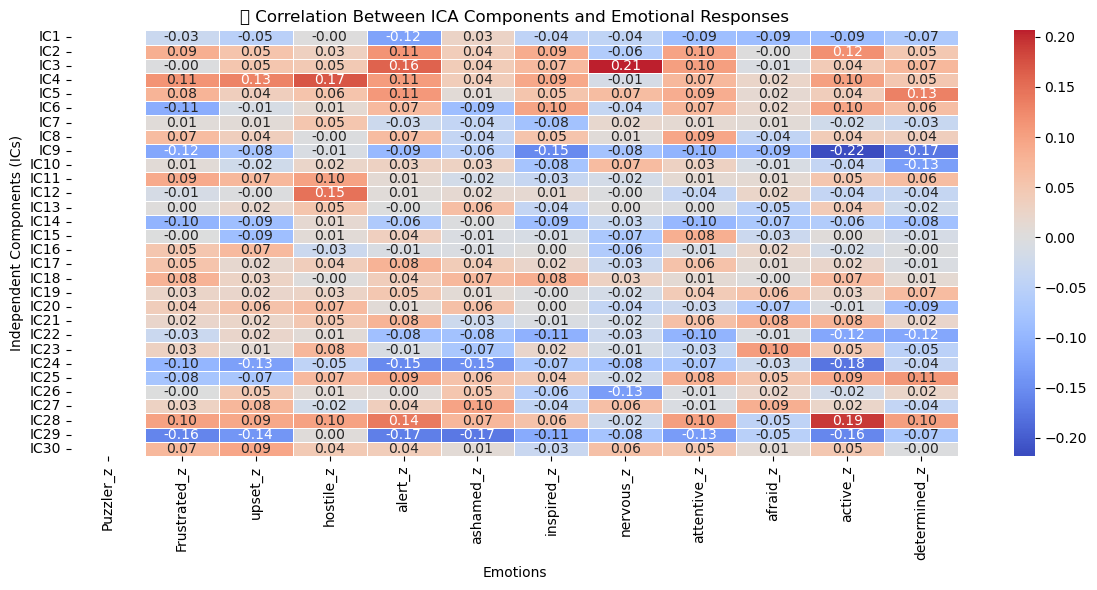

In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import FastICA
import seaborn as sns
import matplotlib.pyplot as plt

# --- Load data ---
data = pd.read_csv("HR_data.csv")
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns='Unnamed: 0')

# --- Identify physiological and emotion columns ---
physio_cols = [col for col in data.columns if col.startswith(("HR_", "TEMP_", "EDA_"))]
emotion_cols = ['Puzzler', 'Frustrated', 'upset', 'hostile', 'alert', 'ashamed',
                'inspired', 'nervous', 'attentive', 'afraid', 'active', 'determined']

# Drop any rows with missing emotional responses
data = data.dropna(subset=emotion_cols)

# ✨ Standardize emotion ratings across individuals
if 'Individual' in data.columns:
    for emo in emotion_cols:
        data[emo + '_z'] = data.groupby('Individual')[emo].transform(
            lambda x: StandardScaler().fit_transform(x.values.reshape(-1, 1)).flatten()
        )
    emotion_cols = [emo + '_z' for emo in emotion_cols]
else:
    # Global standardization (fallback)
    data[emotion_cols] = StandardScaler().fit_transform(data[emotion_cols])
    
# --- Extract and preprocess features ---
X = data[physio_cols]
y_emotions = data[emotion_cols]

X_imputed = SimpleImputer(strategy='mean').fit_transform(X)
X_std = StandardScaler().fit_transform(X_imputed)

# --- Run ICA ---
n_components = 30
ica = FastICA(n_components=n_components, random_state=42)
X_ica = ica.fit_transform(X_std)

# --- Create a DataFrame for ICs + emotions ---
ica_df = pd.DataFrame(X_ica, columns=[f'IC{i+1}' for i in range(n_components)])
combined_df = pd.concat([ica_df, y_emotions.reset_index(drop=True)], axis=1)

# --- Compute correlation matrix ---
correlation_matrix = combined_df.corr().loc[[f'IC{i+1}' for i in range(n_components)], emotion_cols]

# --- Plot heatmap ---
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f", linewidths=0.5)
plt.title("🔍 Correlation Between ICA Components and Emotional Responses")
plt.ylabel("Independent Components (ICs)")
plt.xlabel("Emotions")
plt.tight_layout()
plt.show()


In [24]:
# Get the mixing matrix (A), shape: [n_features x n_components]
mixing_matrix = ica.mixing_

# Turn it into a DataFrame for readability
feature_weights = pd.DataFrame(mixing_matrix, 
                               index=physio_cols, 
                               columns=[f'IC{i+1}' for i in range(n_components)])

# View top features for an important component (e.g., IC3)
print(feature_weights['IC29'].sort_values(key=abs, ascending=False).head(20))


EDA_TD_P_Peaks        -0.548185
EDA_TD_P_Skew          0.329015
EDA_TD_P_Kurtosis      0.313570
EDA_TD_T_Skew         -0.255764
TEMP_TD_Min            0.206676
TEMP_TD_Mean           0.195551
TEMP_TD_Median         0.193452
TEMP_TD_Max            0.188790
TEMP_TD_Skew           0.172559
HR_TD_Skew             0.136501
HR_TD_AUC             -0.110149
TEMP_TD_Slope_max     -0.108391
TEMP_TD_std           -0.101978
HR_TD_Median          -0.100134
EDA_TD_T_Slope_mean   -0.082980
HR_TD_Mean            -0.082310
EDA_TD_T_Slope        -0.082256
EDA_TD_P_ReT           0.081114
EDA_TD_P_RT            0.072219
HR_TD_Slope_max       -0.060939
Name: IC29, dtype: float64


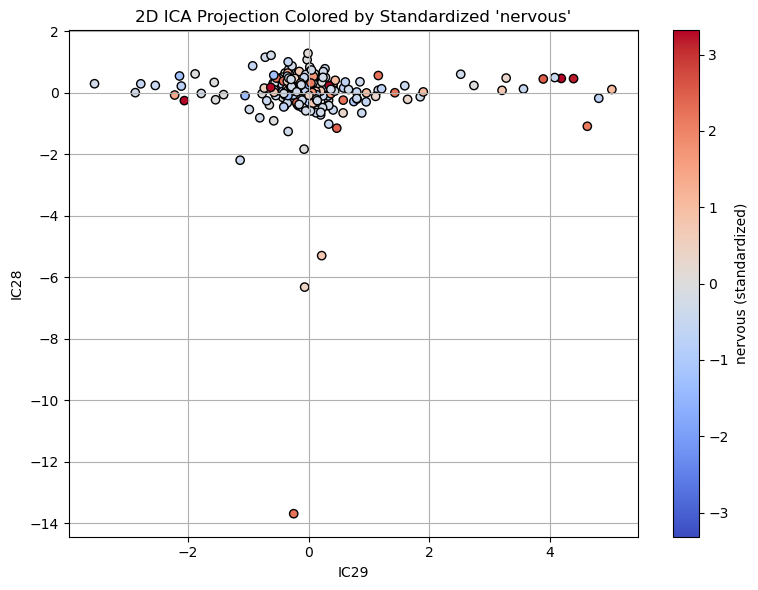

In [36]:
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler

# --- ICA computation ---
ica = FastICA(n_components=30, random_state=42)
X_ica = ica.fit_transform(X_std)
ic_df = pd.DataFrame(X_ica, columns=[f'IC{i+1}' for i in range(30)])

# --- Emotion: standardize across participants if possible ---
emotion_col = 'nervous'  # 👈 the emotion we're projecting
if 'Individual' in data.columns:
    emotion_z = data.groupby('Individual')[emotion_col].transform(
        lambda x: StandardScaler().fit_transform(x.values.reshape(-1, 1)).flatten()
    )
else:
    emotion_z = StandardScaler().fit_transform(data[[emotion_col]]).flatten()

# --- ICA 2D plot ---
component1 = ic_df['IC3']  # or whatever ICs you picked
component2 = ic_df['IC26']

plt.figure(figsize=(8,6))
sc = plt.scatter(component1, component2, c=emotion_z, cmap='coolwarm', edgecolor='k')
plt.colorbar(sc, label=f"{emotion_col} (standardized)")
plt.xlabel("IC29")
plt.ylabel("IC28")
plt.title(f"2D ICA Projection Colored by Standardized '{emotion_col}'")
plt.grid(True)
plt.tight_layout()
plt.show()
